# Data Explore

In [1]:
import pandas as pd

In [7]:
MEMBERS = pd.read_csv("../data/raw/MEMBERS_subset_TRAIN.csv", parse_dates=True)

In [8]:
MEMBERS.head()

,msno,registration_init_time,city,bd,gender,registered_via,_dataobs_
0,DcsEUiNluuWJpgE0xsqViKaWEVG3Phw6GEidDO7WTa0=,2014-10-25,4,35,female,3,151
1,Uc6U4vUApMvVPhdCcOX/bk8Q61bUwHqdmZRpkEuSn6k=,2014-10-26,1,45,female,3,166
2,u05b27BhTPzuCEs+64NV3vntjEFXnxXpasJoTYZiPVM=,2014-10-28,1,51,male,3,212
3,q7a3cgDX32yxVZ8+wgkltxBHvjLMam7gd4AGtA2Mnes=,2014-11-02,1,0,NaN,9,288
4,xt3x86CidZyZhnU0dKjp5jF3XcapifSU0jSkIFfSn6g=,2014-11-02,1,37,male,3,303


In [9]:
MEMBERS.describe()

,city,bd,registered_via,_dataobs_
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,3.830780,9.759410,5.255210,3.380133e+06
std,5.464354,16.317812,2.360829,1.956257e+06
min,1.000000,-506.000000,1.000000,1.510000e+02
25%,1.000000,0.000000,4.000000,1.684020e+06
50%,1.000000,0.000000,4.000000,3.377832e+06
75%,4.000000,21.000000,7.000000,5.067187e+06
max,22.000000,1029.000000,19.000000,6.769339e+06


In [6]:
MEMBERS[MEMBERS["gender"].isna() == True]

,msno,registration_init_time,city,bd,gender,registered_via,_dataobs_
3,q7a3cgDX32yxVZ8+wgkltxBHvjLMam7gd4AGtA2Mnes=,2014-11-02,1,0,NaN,9,288
7,RnGFlJLKI5TJbZbAln7UM6scpxEcn1BPa0GCTaNLdAk=,2016-12-24,1,0,NaN,4,495
8,2237rQOG7o59tpbgp8aHrvs8FSQs2dyZ6dAMyKTCkhQ=,2016-12-27,1,0,NaN,4,563
9,ii5zT0mq1i3CfbiaJfzQac7XwCWdGCZeq54gyaMU2uQ=,2016-12-31,1,0,NaN,4,649
10,EsQRjAOWQLOld+BkvuQrPonPQla/LQmFZupwH8dtnes=,2017-01-06,1,0,NaN,4,783
11,hvCI+Qj5SGTdzAK84uc63sS1li8XCU0HqYkcTZBX/CE=,2017-01-10,1,0,NaN,4,858
12,bpkbjevoiZY4q6QVFGitmYQOHfgKogywBXVsAvsgTaQ=,2017-01-13,1,0,NaN,4,894
13,cFMxlE04/LYqXBvMUyiMgz7ZxK4CMTvFaBdNWfLwLiw=,2017-01-16,1,0,NaN,4,952
14,jX+3htdsg9vbIEetMrE4zCHv+5x7bkzbhxfDbuA0tzI=,2017-01-18,1,0,NaN,4,990
15,PrmUAZalFMNZGUnOGbHVBgIDOurjbx9nEFirNBMJXKM=,2017-01-20,1,0,NaN,4,1023


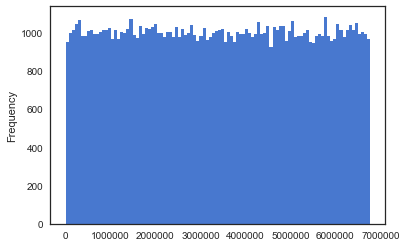

In [13]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

MEMBERS._dataobs_.plot.hist(bins=100)

In [14]:
STATUS = pd.read_csv("../data/raw/STATUS_subset_TRAIN.csv")

In [15]:
STATUS.head()

,msno,status
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1


In [18]:
STATUS['status'] = STATUS['status'].astype(str)
STATUS['status'].value_counts()

1    31577
0    18139
Name: status, dtype: int64

In [19]:
TRANSACTION = pd.read_csv("../data/raw/TRANSACTION_subset_TRAIN.csv", parse_dates=True)

In [20]:
TRANSACTION.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
0,++38dVm0EHKCOfND6oEal3xFKtqJYZTZJmnpbAOOZBk=,41,30,99,99,1,2016-10-23,2016-11-23,0,288
1,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,41,30,149,149,1,2015-09-10,2015-09-10,1,325
2,++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=,37,30,149,149,1,2015-08-01,2015-09-01,0,649
3,++AQDoOxAjCANtzB0K8e0PUE42NzvA3MsXpTFCpArdg=,28,30,150,150,0,2015-07-29,2015-08-28,0,858
4,++GsvnZ4JH4atR+6ObvwrVhDQv9Y1jc7zuTIF4Fv0o8=,41,30,99,99,1,2016-07-14,2016-08-14,0,1357


In [21]:
TRANSACTION['is_cancel'] = TRANSACTION['is_cancel'].astype(str)
TRANSACTION['is_cancel'].value_counts()

0    96043
1     3957
Name: is_cancel, dtype: int64

In [22]:
TRANSACTION['is_auto_renew'] = TRANSACTION['is_auto_renew'].astype(str)
TRANSACTION['is_auto_renew'].value_counts()

1    84608
0    15392
Name: is_auto_renew, dtype: int64

In [30]:
Non_monthly_sub = TRANSACTION['payment_plan_days'][TRANSACTION['payment_plan_days'] != 30][TRANSACTION['payment_plan_days'] != 31]

In [31]:
Non_monthly_sub.astype(str)
Non_monthly_sub.value_counts()

0      3983
7      2756
410     683
195     652
180     356
10      168
90      119
100     116
395      81
120      61
360      39
200      34
14       32
60       30
1        27
415      20
365      18
400      18
240      15
450      11
35       10
21        8
45        7
270       5
70        4
80        4
99        2
3         1
66        1
110       1
230       1
Name: payment_plan_days, dtype: int64

In [32]:
TRANSACTION[TRANSACTION["plan_list_price"] != TRANSACTION["actual_amount_paid"]]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
11,++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=,41,0,0,149,1,2015-05-11,2015-06-11,0,2921
16,++qTmh4qA8N9/jpTo4sNdzOoQt8ZepzMQ5cfqcFGlGI=,41,0,0,129,1,2015-04-26,2015-05-27,0,4378
25,+/HX2PT+BDrt9ffaSx9NXlaK5GLM+qrsQiqCza6OESU=,34,0,0,149,1,2015-03-31,2015-04-30,0,6584
30,+/POEfZTiZXab52KAylsVF73K92L1N1dbzxtya1cy5A=,41,30,149,0,1,2015-10-14,2015-11-14,0,7157
32,+/TR9RCS4MnDpgn6VESmkwrcVzCBZIzXWZrJEdVJ2hk=,41,30,149,0,1,2015-12-03,2016-01-03,0,7481
36,+/bYUjd3W3M3gF2RAg3a59xDYfZ4K9yp/wqvs8M+UOo=,41,30,149,0,1,2015-11-28,2015-12-31,0,8001
53,+0B7J43k8tHL6AdjUEYwSXXKTlITzImYsPkzuIK5y0A=,41,30,149,0,1,2015-09-27,2015-09-30,1,11261
58,+0PugnuareDBoZNSLF7TXyi/YdML4rI0nc/zNhbY8zU=,41,30,149,0,1,2016-01-02,2016-01-02,1,12430
79,+0xDtlx8/0vMhabw7zCuES1ux/G9egVqHo6Rbbn+ers=,41,30,149,119,1,2015-08-03,2015-09-03,0,15661
85,+1DpbtT3nkKzzG6/KvW+ivEfV0GOX51k/mn7o4bzR0s=,33,0,0,149,1,2015-07-31,2015-08-31,0,17031


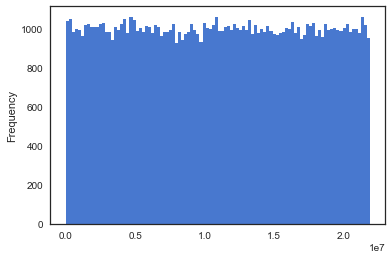

In [33]:
TRANSACTION._dataobs_.plot.hist(bins=100)

In [34]:
USER_LOGS = pd.read_csv("../data/raw/USER_LOGS_subset_TRAIN.csv", parse_dates=True)

In [35]:
USER_LOGS.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
0,KrtHMRcPO1hhclZLDp7Rfd4EuWnkeE3uIYLhh2bjOAs=,2015-01-04,5,1,2,3,8,16,3105.657,6323
1,/osNsLxx3k7if1esxb2GpYHNkHnmNPOU3292bANjBGc=,2017-02-26,1,0,2,0,5,8,1592.751,7000
2,9/WzsCZLLsiNdZSbJXwtDotjEIRcFoAuSp84CH4GArw=,2015-05-25,0,0,0,0,15,15,2422.230,7527
3,wZhG4MNE0HD00iHO0dhRH0P8dkqE9rZGuZVmF8Hf0SM=,2015-04-17,0,0,0,0,47,1,9668.558,9062
4,vuiqdXbZfyKDbUx5Y8drB6NAUxuvR6P5/Rj8+8b21JM=,2017-01-31,2,3,3,1,70,31,18793.319,9953


In [38]:
USER_LOGS.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05
mean,6.55941,1.649440,1.015130,1.126220,30.62194,30.066780,-1.291272e+12,1.955153e+08
std,14.55745,4.261639,2.180676,2.732274,40.73382,33.896641,1.091253e+14,1.131440e+08
min,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,-9.223372e+15,6.323000e+03
25%,0.00000,0.000000,0.000000,0.000000,6.00000,8.000000,1.878381e+03,9.803536e+07
50%,2.00000,1.000000,0.000000,0.000000,16.00000,19.000000,4.614436e+03,1.950406e+08
75%,7.00000,2.000000,1.000000,1.000000,38.00000,40.000000,1.026148e+04,2.931583e+08
max,1187.00000,343.000000,143.000000,172.000000,1632.00000,1190.000000,2.419718e+06,3.921047e+08


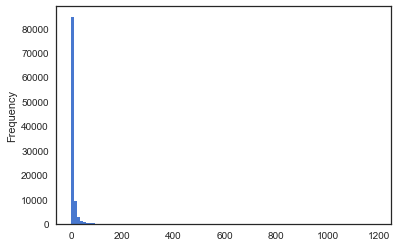

In [39]:
USER_LOGS.num_25.plot.hist(bins=100)

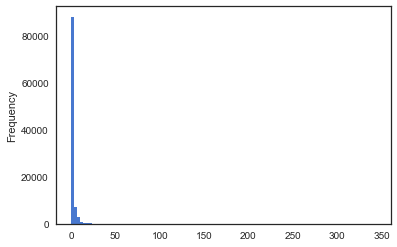

In [40]:
USER_LOGS.num_50.plot.hist(bins=100)

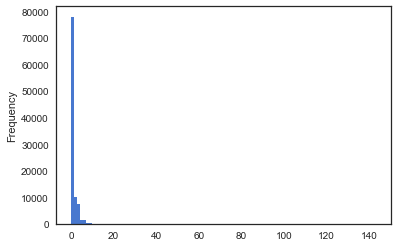

In [41]:
USER_LOGS.num_75.plot.hist(bins=100)

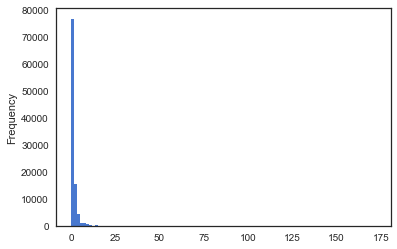

In [42]:
USER_LOGS.num_985.plot.hist(bins=100)

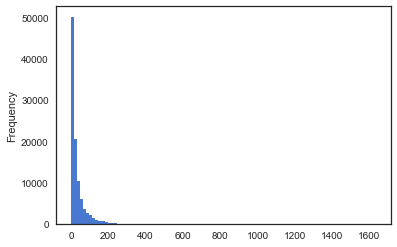

In [43]:
USER_LOGS.num_100.plot.hist(bins=100)